## How to Approach Machine Learning Projects

Đây là notebook follow theo [Zero to Data Science Bootcamp by Jovian](https://zerotodatascience.com).

<img src="https://i.imgur.com/kKdAALX.png" width=800>

Các bước tiếp cận 1 dự án ML:

1. Hiểu business requirements và bản chất sẵn có của data

2. Phân loại các vấn đề theo supervised/unsupervised và regression/classification

3. Load, clean, EDA và feature engineering

4. Tạo Train - Validation - Test và chuẩn bị data để train model

5. Khởi tạo 1 baseline model (nhanh gọn và dễ dàng) để đánh giá, benchmark các models trong tương lai

6. Chọn 1 model strategy, train model và tune hyperparameters để có được best-fit.

7. Thử nghiệm và kết hợp các kết quả từ nhiều strategy khác nhau để có được kết quả tốt hơn (Regularization - Ensembling)

    - Regularization: L1 Lasso, L2 Ridge, Elastic net

    - Ensembling: Bagging (các mô hình học độc lập và aggregate kết quả với nhau - Random Forest), Boosting (Chuỗi học tập, mỗi model mới sửa lỗi model cũ - AdaBoost, Gradient Boosting, XGBoost), Stacking (Sử dụng các loại mô hình khác nhau + sử dụng 1 mô hình meta để tìm cách tốt nhất để kết hợp các prediction từ các mô hình cơ sở )

8. Diễn giải mô hình, nghiên cứu từng dự đoán và presentations

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Dưới đây là 1 sơ đồ phân chia các loại mô hình trong ML:

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

### Loss Functions and Evaluation Metrics

Tùy thuộc vào loại mô hình, sẽ có những **loss function** phù hợp để đánh giá

* **Evaluation metrics** - Sử dụng bởi con người để đánh giá

* **Loss functions** - Sử dụng bởi máy tính để đánh giá

Thông thường chúng giống nhau trong các bài toán:

- Regression:

    #1 — RMSE (Root Mean Squared Error)

    #2 — RMSLE (Root Mean Squared Logarithmic Error)

    #3 — MAE (Mean Absolute Error)

    #4 — R-Squared (R²)

- Classification: 

    #5 — Accuracy and Error Rate

    #6 — Precision and Recall

    #7 — F1-Score and Fbeta-Score

    #8 — MCC (Matthews Correlation Coefficient)

    #9 — Balanced Accuracy

    #10 — Log Loss (or Cross Entropy or Negative Log-Likelihood)

    #11 — AUCROC (Area Under the Receiver Operating Characteristic Curve)

Xem thêm tại đây: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

#### Regression loss function

In [4]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

y_true = [1.0, 1.5, 2.0, 2.5, 3.0]
y_pred = [0.9, 1.7, 3.0, 2.0, 2.7]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmse

0.5272570530585626

In [5]:
# RMSLE
import numpy as np
from sklearn.metrics import mean_squared_error

y_true = [1.0, 1.5, 2.0, 2.5, 3.0]
y_pred = [0.9, 1.7, 3.0, 2.0, 2.7]

rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))
rmsle

0.15566336290314164

In [6]:
# MAE
from sklearn.metrics import mean_absolute_error

y_true = [1.0, 1.5, 2.0, 2.5, 3.0]
y_pred = [0.9, 1.7, 3.0, 2.0, 2.7]

mae = mean_absolute_error(y_true, y_pred)
mae

0.41999999999999993

#### Classification loss function

In [7]:
from sklearn.metrics import accuracy_score

y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.625

In [9]:
from sklearn.metrics import precision_score, recall_score

y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]

precision, recall = precision_score(y_true, y_pred), recall_score(y_true, y_pred)
precision, recall

(0.75, 0.6)

In [10]:
from sklearn.metrics import f1_score, fbeta_score

y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]

f1, fbeta = f1_score(y_true, y_pred), fbeta_score(y_true, y_pred, beta=2)
f1, fbeta

(0.6666666666666666, 0.625)

In [12]:
from sklearn.metrics import matthews_corrcoef

y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]

y_true_swap = [0, 1, 0, 0, 1, 0, 0, 1]
y_pred_swap = [1, 1, 0, 0, 1, 1, 0, 0]

mcc = matthews_corrcoef(y_true, y_pred)
mcc_swap = matthews_corrcoef(y_true_swap, y_pred_swap)

mcc, mcc_swap

(0.2581988897471611, 0.2581988897471611)

In [15]:
from sklearn.metrics import balanced_accuracy_score

y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

In [14]:
from sklearn.metrics import log_loss

y_true =  [0, 1, 0, 0, 1, 0]
y_proba = [0.1, 0.4, 0.8, 0.1, 0.9, 0.4]
log_loss(y_true, y_proba)

0.5587726358412874

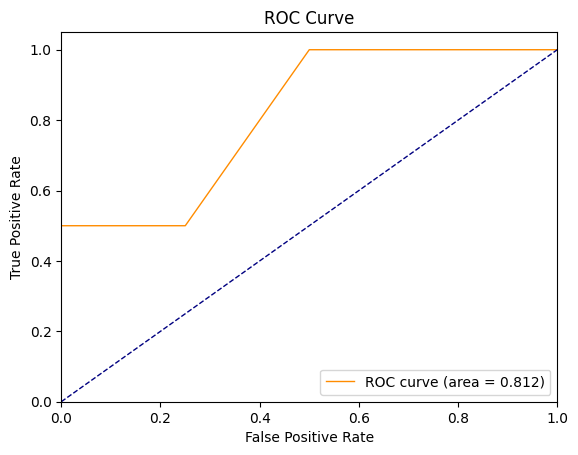

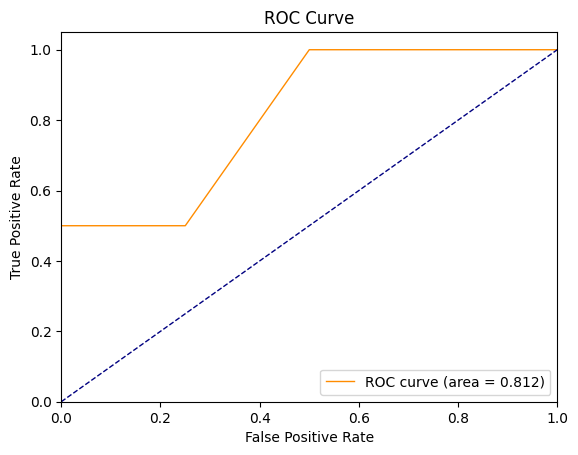

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


def plotROC(y_true, y_proda):
    fpr = dict()
    tpr = dict()
    threshold = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], threshold[i] = roc_curve(abs(np.array(y_true)-abs(i-1)),y_proba)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=1, label='ROC curve (area = %0.3f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


y_true =  [0, 1, 0, 0, 1, 0]
y_proba = [0.1, 0.4, 0.8, 0.05, 0.9, 0.4]
plotROC(y_true, y_proba)
# AUCROC = 0.812

# Change probability without changing the order.
y_true =  [0, 1, 0, 0, 1, 0]
y_proba = [0.3, 0.49, 0.5, 0.01, 0.99, 0.49]
plotROC(y_true, y_proba)
# AUCROC = 0.812

## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

### Train/Test/Validation Split

Tỉ trọng train / valid / test:

- Chưa có test riêng: 60 - 20 - 20

- Đã có test riêng: 75 - 25 - test

## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

In [1]:
def return_mean(inputs):
    return np.full(len(inputs), df['target'].mean())

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">

In [ ]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

Hoặc tạo 1 df lưu trữ thông tin kết quả

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Hàm tính RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Hàm để thử mô hình và lưu trữ kết quả vào DataFrame
def try_model(model, model_name, results_df):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    
    # Thêm kết quả vào DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Validation RMSE': val_rmse
    }, ignore_index=True)
    
    return results_df

# Tạo DataFrame trống để lưu trữ kết quả
results_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Validation RMSE'])

# Ví dụ sử dụng hàm với các mô hình khác nhau
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

for model_name, model in models.items():
    results_df = try_model(model, model_name, results_df)

print(results_df)

## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">


Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)): 

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

## Summary and References

![](https://i.imgur.com/kKdAALX.png)

Here's the summary of the step-by-step process you should follow to approach any machine learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
5. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
6. Experiment and combine results from multiple strategies to get a better overall result.
7. Interpret models, study individual predictions, and present your findings. 


Check out the following resources to learn more:

- https://vas3k.com/blog/machine_learning/
- https://github.com/abhishekkrthakur/approachingalmost
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners

## Revision Questions
1.	What are the steps involved in approaching a machine learning problem?
2.	What does problem identification mean?
3.	What is a loss function? Explain different loss functions.
4.	What is an evaluation metric? Explain different evaluation metrics.
5.	What is feature engineering?
6.	How does feature engineering help in building a better model?
7.	What is a baseline model?
8.	What is a hard-coded strategy?
9.	What are linear models?
10.	What are tree based models?
11.	What are some unsupervised machine learning problems?
12.	What are some strategies used to improve the performance of a model?
13.	What is grid-search?
14.	What is K-fold cross validation?
15.	What is ensembling? What are some ensemble methods?
16.	How does ensembling help in making better predictions?
17.	What is stacking?
18.	How does stacking help in making better predictions?
19.	What is model deployment?
20.	What are some model deployment frameworks? 